### Step 1 — Imports & parameters
Set the random seed for reproducibility, choose the sample size n, and prepare a vector of flip
probabilities e to sweep.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
n = 100_000 # number of bits
es = np.linspace(0.0, 0.5, 21) # 0, 0.025, ..., 0.5

### Step 2 — Generate random input bits
Use {0,1} bits uniformly at random. For other experiments you can try biased inputs; for BER on
a BSC the result is the same for i.i.d. inputs.

In [3]:
X = rng.integers(0, 2, size=n) # 0/1 equiprobable

### Step 3 — BSC simulation function
Flip each bit independently with probability e, using XOR to apply flips efficiently.

In [5]:
def bsc_transmit(bits, e, rng=None):
    rng = np.random.default_rng(rng)
    flips = (rng.random(len(bits)) < e).astype(int)
    return bits ^ flips # XOR flips bits where flips==1

### Step 4 — BER computation
The Bit Error Rate is the fraction of positions where input and output differ.

In [6]:
def ber(x, y):
    return np.mean(x != y)

### Step 5 — Sweep e and record empirical BER
Compute BER for each e; then plot a single clean figure of BER vs e.

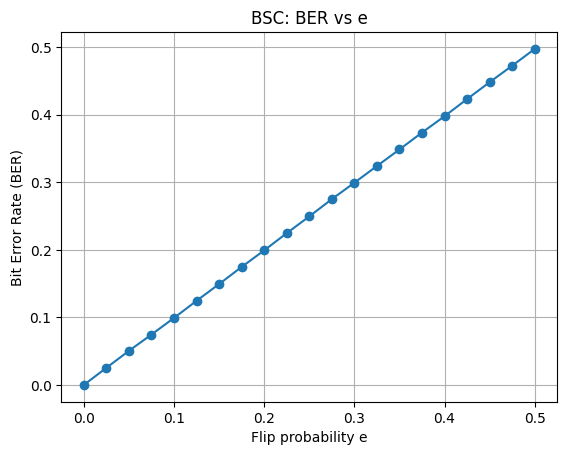

In [7]:
bers = []
for e in es:
    Y = bsc_transmit(X, e=e, rng=42) # fixed seed for repeatability
    bers.append(ber(X, Y))

plt.figure()
plt.plot(es, bers, marker='o')
plt.xlabel('Flip probability e')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BSC: BER vs e')
plt.grid(True)
plt.show()

### Step 6 — Compare to theory
For a BSC with i.i.d. input, the expected BER equals e. Show the numeric difference to verify
Monte‑Carlo accuracy.

In [9]:
diff = np.array(bers) - es
for e, b, d in zip(es, bers, diff):
    print(f"e={e:0.3f} BER={b:0.5f} (BER - e)={d:+0.5f}")

e=0.000 BER=0.00000 (BER - e)=+0.00000
e=0.025 BER=0.02529 (BER - e)=+0.00029
e=0.050 BER=0.05046 (BER - e)=+0.00046
e=0.075 BER=0.07455 (BER - e)=-0.00045
e=0.100 BER=0.09916 (BER - e)=-0.00084
e=0.125 BER=0.12454 (BER - e)=-0.00046
e=0.150 BER=0.14931 (BER - e)=-0.00069
e=0.175 BER=0.17467 (BER - e)=-0.00033
e=0.200 BER=0.19921 (BER - e)=-0.00079
e=0.225 BER=0.22464 (BER - e)=-0.00036
e=0.250 BER=0.24948 (BER - e)=-0.00052
e=0.275 BER=0.27498 (BER - e)=-0.00002
e=0.300 BER=0.29935 (BER - e)=-0.00065
e=0.325 BER=0.32405 (BER - e)=-0.00095
e=0.350 BER=0.34857 (BER - e)=-0.00143
e=0.375 BER=0.37361 (BER - e)=-0.00139
e=0.400 BER=0.39779 (BER - e)=-0.00221
e=0.425 BER=0.42321 (BER - e)=-0.00179
e=0.450 BER=0.44819 (BER - e)=-0.00181
e=0.475 BER=0.47258 (BER - e)=-0.00242
e=0.500 BER=0.49743 (BER - e)=-0.00257


### Step 7 — (Optional) Confidence intervals & sample size
The BER estimator is binomial with variance e(1−e)/n. Use ±1.96·sqrt(e(1−e)/n) to gauge
expected fluctuations, and see how increasing n tightens the interval.

In [11]:
def ber_ci_width(e, n, z=1.96):
    import numpy as np
    var = e*(1-e)/n
    return z*np.sqrt(var)

for e in [0.05, 0.1, 0.2, 0.3]:
    w = ber_ci_width(e, n)
    print(f"e={e:.2f} 95% CI half-width ≈ {w:.5f}")

e=0.05 95% CI half-width ≈ 0.00135
e=0.10 95% CI half-width ≈ 0.00186
e=0.20 95% CI half-width ≈ 0.00248
e=0.30 95% CI half-width ≈ 0.00284
